In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
boston_housing_data = pd.read_csv('HousingData.csv')
boston_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       486 non-null float64
ZN         486 non-null float64
INDUS      486 non-null float64
CHAS       486 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        486 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      486 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [41]:
boston_housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [42]:
boston_housing_data = boston_housing_data.drop(columns=['LSTAT','MEDV'])
boston_housing_data.shape

(506, 12)

In [43]:
col_names = ['CrimeRate','ZondeRatio','IndusRatio','AlongRiver','NO2Level','Rooms/house','OldHomeRatio','DisFromCenter',
             'RoadAccessIndex','PropTax','PupilTeacherRatio','MedianHomeValue']

In [44]:
boston_housing_data.columns = col_names
boston_housing_data.head()

,CrimeRate,ZondeRatio,IndusRatio,AlongRiver,NO2Level,Rooms/house,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTax,PupilTeacherRatio,MedianHomeValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90


In [45]:
boston_housing_data = boston_housing_data.replace('NA', np.nan)

In [46]:
boston_housing_data.isnull().sum().sort_values(ascending=False)

OldHomeRatio         20
AlongRiver           20
IndusRatio           20
ZondeRatio           20
CrimeRate            20
MedianHomeValue       0
PupilTeacherRatio     0
PropTax               0
RoadAccessIndex       0
DisFromCenter         0
Rooms/house           0
NO2Level              0
dtype: int64

In [47]:
boston_data = boston_housing_data.fillna(boston_housing_data.mean())
boston_data.isna().sum()

CrimeRate            0
ZondeRatio           0
IndusRatio           0
AlongRiver           0
NO2Level             0
Rooms/house          0
OldHomeRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTax              0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

In [48]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CrimeRate            506 non-null float64
ZondeRatio           506 non-null float64
IndusRatio           506 non-null float64
AlongRiver           506 non-null float64
NO2Level             506 non-null float64
Rooms/house          506 non-null float64
OldHomeRatio         506 non-null float64
DisFromCenter        506 non-null float64
RoadAccessIndex      506 non-null int64
PropTax              506 non-null int64
PupilTeacherRatio    506 non-null float64
MedianHomeValue      506 non-null float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [49]:
boston_data.shape

(506, 12)

In [50]:
target = boston_data['MedianHomeValue']
features = boston_data.drop('MedianHomeValue', axis=1)

In [51]:
features.shape, target.shape

((506, 11), (506,))

In [52]:
from yellowbrick.target import FeatureCorrelation
feat_names = list(features.columns)

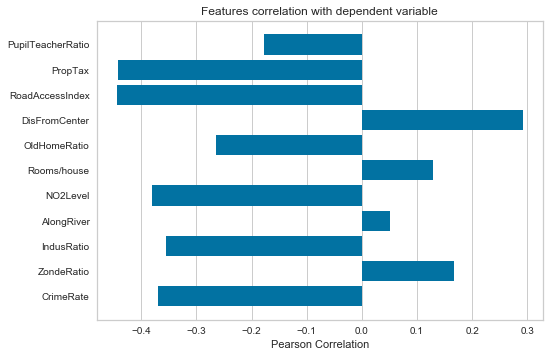

In [53]:
visualizer = FeatureCorrelation(labels=feat_names)
visualizer.fit(features, target)
visualizer.poof()

In [54]:
# Filter Method-1
# Univariate linear regression test which calculates
#  correlation between each regressor and target
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [55]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)

In [56]:
feature_mask = select_univariate.get_support()
feature_mask

array([ True, False,  True, False,  True, False, False, False,  True,
        True, False])

In [57]:
features.columns[feature_mask]

Index(['CrimeRate', 'IndusRatio', 'NO2Level', 'RoadAccessIndex', 'PropTax'], dtype='object')

In [58]:
# F- Value calculated between Features and Target
select_univariate.scores_

array([ 80.02345398,  14.53626072,  72.48672794,   1.26592041,
        85.08680733,   8.40423667,  38.153908  ,  46.80706411,
       124.03953584, 122.23812092,  16.37346572])

In [59]:
pd.DataFrame({'FeatureName': features.columns, 'Score': select_univariate.scores_}).sort_values(by='Score', ascending=False)

,FeatureName,Score
8,RoadAccessIndex,124.039536
9,PropTax,122.238121
4,NO2Level,85.086807
0,CrimeRate,80.023454
2,IndusRatio,72.486728
7,DisFromCenter,46.807064
6,OldHomeRatio,38.153908
10,PupilTeacherRatio,16.373466
1,ZondeRatio,14.536261
5,Rooms/house,8.404237


In [60]:
uni_df = pd.DataFrame({'Univariate Method': features.columns[feature_mask]})

In [61]:
# Wrapper Method using RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lin_reg = LinearRegression()

In [62]:
# Recursive features Elimination or RFE considers
# small groups or subset of datasets and 
# prunes least revelant feature at each step

In [63]:
# We are choosing 5 best features eliminating one feature at a time
rfe = RFE(estimator=lin_reg, n_features_to_select=5, step=1)

In [64]:
rfe.fit(features,target)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [65]:
rfe_features = features.columns[rfe.support_]
rfe_features

Index(['CrimeRate', 'AlongRiver', 'NO2Level', 'Rooms/house',
       'RoadAccessIndex'],
      dtype='object')

In [66]:
# RFE provides us with ranking of features that are good features
pd.DataFrame({'FeatureName' : features.columns, 'Rank' : rfe.ranking_}).sort_values(by='Rank')

,FeatureName,Rank
0,CrimeRate,1
3,AlongRiver,1
4,NO2Level,1
5,Rooms/house,1
8,RoadAccessIndex,1
7,DisFromCenter,2
2,IndusRatio,3
10,PupilTeacherRatio,4
6,OldHomeRatio,5
9,PropTax,6


In [67]:
rfe_df = pd.DataFrame({'RFE Method': rfe_features})
rfe_df

,RFE Method
0,CrimeRate
1,AlongRiver
2,NO2Level
3,Rooms/house
4,RoadAccessIndex


In [68]:
# Machine learning extensions is an open source
# Python library of useful data science tools
!pip install mlxtend --upgrade

In [69]:
# Install Joblib library which is responsible 
# for Sequenctial Feature Selector from mlxtend library
!pip install joblib --upgrade

  Found existing installation: joblib 0.13.2
    Uninstalling joblib-0.13.2:
      Successfully uninstalled joblib-0.13.2


In [70]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [72]:
# We will use this for Forward and Backward Selection of Fetaures
# We will choose Linear Regression model to iteratively remove one feature at a time
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                             k_features=5,
                                             forward=False,
                                             scoring= 'neg_mean_squared_error',
                                             cv=4)

In [73]:
feat_filtered = feature_selector.fit(features, target)

In [74]:
backward_feat = list(feat_filtered.k_feature_names_)
backward_feat

['CrimeRate', 'ZondeRatio', 'IndusRatio', 'AlongRiver', 'OldHomeRatio']

In [75]:
back_df = pd.DataFrame({'Backward Method': backward_feat})
back_df

,Backward Method
0,CrimeRate
1,ZondeRatio
2,IndusRatio
3,AlongRiver
4,OldHomeRatio


In [76]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                             k_features=5,
                                             forward=True,
                                             scoring= 'neg_mean_squared_error',
                                             cv=4)

In [77]:
feat_filtered = feature_selector.fit(features, target)

In [78]:
forward_features = list(feat_filtered.k_feature_names_)
forward_features

['CrimeRate', 'ZondeRatio', 'IndusRatio', 'AlongRiver', 'PropTax']

In [79]:
forw_df = pd.DataFrame({'Forward Method': forward_features})
forw_df

,Forward Method
0,CrimeRate
1,ZondeRatio
2,IndusRatio
3,AlongRiver
4,PropTax


In [80]:
from sklearn.linear_model import Lasso

In [81]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(features, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
lasso_coef = pd.DataFrame({'Feature': features.columns,
                           'LassoCoef': lasso_reg.coef_}).sort_values(by = 'LassoCoef', ascending=False)
lasso_coef

,Feature,LassoCoef
3,AlongRiver,2.939206
10,PupilTeacherRatio,2.133434
1,ZondeRatio,0.008516
4,NO2Level,-0.000000
5,Rooms/house,-0.000000
7,DisFromCenter,0.000000
6,OldHomeRatio,-0.049358
9,PropTax,-0.059055
2,IndusRatio,-1.399974
0,CrimeRate,-1.573156


In [86]:
 # Here we can consider those that are close to the 
# zero are irrelevant features 

In [87]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by= 'LassoCoef', ascending=False)

,Feature,LassoCoef
3,AlongRiver,2.939206
8,RoadAccessIndex,2.196835
10,PupilTeacherRatio,2.133434
0,CrimeRate,1.573156
2,IndusRatio,1.399974
9,PropTax,0.059055
6,OldHomeRatio,0.049358
1,ZondeRatio,0.008516
4,NO2Level,0.000000
5,Rooms/house,0.000000


In [88]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)
lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})
lasso_df

,Lasso Method
0,AlongRiver
1,RoadAccessIndex
2,PupilTeacherRatio
3,CrimeRate
4,IndusRatio


In [89]:
comp_selected_col_df = [uni_df,rfe_df,back_df,forw_df,lasso_df]
final_df = pd.concat(comp_selected_col_df, axis=1)
final_df

,Univariate Method,RFE Method,Backward Method,Forward Method,Lasso Method
0,CrimeRate,CrimeRate,CrimeRate,CrimeRate,AlongRiver
1,IndusRatio,AlongRiver,ZondeRatio,ZondeRatio,RoadAccessIndex
2,NO2Level,NO2Level,IndusRatio,IndusRatio,PupilTeacherRatio
3,RoadAccessIndex,Rooms/house,AlongRiver,AlongRiver,CrimeRate
4,PropTax,RoadAccessIndex,OldHomeRatio,PropTax,IndusRatio


In [90]:
# Perform Machine Learning now and see which features and results combination is better

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [92]:
result = []

def best_score(name, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linear_model = LinearRegression(normalize=True).fit(X_train, y_train)
    print(name)
    print('Training Score : ', linear_model.score(X_train,y_train))
    
    y_pred = linear_model.predict(X_test)
    print('R^2 Score : ', r2_score(y_test, y_pred))

In [93]:
best_score('Univiriate',features[final_df['Univariate Method'].values], target)

Univiriate
Training Score :  0.23881613960077644
R^2 Score :  0.1703583814264198


In [94]:
best_score('Recursive',features[final_df['RFE Method'].values], target)

Recursive
Training Score :  0.2085835247181217
R^2 Score :  0.30559578003856314


In [95]:
best_score('Backward Method',features[final_df['Backward Method'].values], target)

Backward Method
Training Score :  0.21366755389063882
R^2 Score :  0.006289353560558597


In [96]:
best_score('Forward Method',features[final_df['Forward Method'].values], target)

Forward Method
Training Score :  0.23549082891693188
R^2 Score :  0.14761784422054558


In [97]:
best_score('Lasso Method',features[final_df['Lasso Method'].values], target)

Lasso Method
Training Score :  0.2139504093458472
R^2 Score :  0.27764500652195745
